SUJET:PREDICTION DE LA TEMPERATURE DANS UNE VILLE A PARTIR D'UNE SERIE TEMPORELLE

Recuperation des données

In [ ]:
import requests
import pandas as pd

# Effectuer une requête GET à l'API
response = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=5.3544&longitude=-4.0017&start_date=2020-01-01&end_date=2023-12-31&hourly=temperature_2m&timezone=GMT')

# Vérifier si la requête a réussi (code de statut 200)
if response.status_code == 200:
    # Convertir la réponse JSON en un dictionnaire Python
    data_dict = response.json()

    # Créer un DataFrame à partir du dictionnaire
    df = pd.DataFrame(data_dict)

    # Afficher le DataFrame
    print(df)
else:
    # Afficher un message d'erreur si la requête a échoué
    print('La requête à l\'API a échoué avec le code de statut :', response.status_code)


                latitude  longitude  generationtime_ms  utc_offset_seconds  \
time            5.377856  -4.023193            0.97096                   0   
temperature_2m  5.377856  -4.023193            0.97096                   0   

               timezone timezone_abbreviation  elevation hourly_units  \
time                GMT                   GMT       54.0      iso8601   
temperature_2m      GMT                   GMT       54.0           °C   

                                                           hourly  
time            [2020-01-01T00:00, 2020-01-01T01:00, 2020-01-0...  
temperature_2m  [25.8, 25.5, 25.1, 25.0, 26.0, 25.8, 23.9, 24....  


In [ ]:
df.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,5.377856,-4.023193,0.97096,0,GMT,GMT,54.0,iso8601,"[2020-01-01T00:00, 2020-01-01T01:00, 2020-01-0..."
temperature_2m,5.377856,-4.023193,0.97096,0,GMT,GMT,54.0,°C,"[25.8, 25.5, 25.1, 25.0, 26.0, 25.8, 23.9, 24...."


In [ ]:
df['hourly']['time'][:5]

['2020-01-01T00:00',
 '2020-01-01T01:00',
 '2020-01-01T02:00',
 '2020-01-01T03:00',
 '2020-01-01T04:00']

In [ ]:
#create a new dataframe with only column time and temperature
new_df=pd.DataFrame(columns=['time','temperature_2m'])
new_df['time']=df['hourly']['time']
new_df['temperature_2m']=df['hourly']['temperature_2m']
new_df.head()

,time,temperature_2m
0,2020-01-01T00:00,25.8
1,2020-01-01T01:00,25.5
2,2020-01-01T02:00,25.1
3,2020-01-01T03:00,25.0
4,2020-01-01T04:00,26.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            35064 non-null  object 
 1   temperature_2m  35064 non-null  float64
dtypes: float64(1), object(1)
memory usage: 548.0+ KB


In [ ]:
new_df['time'] = pd.to_datetime(new_df['time'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            35064 non-null  datetime64[ns]
 1   temperature_2m  35064 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 548.0 KB


In [ ]:
# Créer une nouvelle colonne 'date' pour la date
#new_df['date'] = new_df['time'].dt.date

# Créer une nouvelle colonne 'heure' pour l'heure
#new_df['hour'] = new_df['time'].dt.time
# Définir la colonne 'datetime_col' comme index
new_df= new_df.set_index('time')
new_df.head()

,temperature_2m
time,
2020-01-01 00:00:00,25.8
2020-01-01 01:00:00,25.5
2020-01-01 02:00:00,25.1
2020-01-01 03:00:00,25.0
2020-01-01 04:00:00,26.0


In [ ]:
def moyenne_temperatures_successives(df):
    # Assurer que le DataFrame est trié par la colonne de temps
    df = df.sort_values(by='time')

    # Initialiser un DataFrame pour stocker les nouvelles données
    nouvelles_donnees = pd.DataFrame(columns=['time', 'mean_temperature'])

    # Parcourir le DataFrame par pas de 3
    for i in range(0, len(df) - 2, 3):
        # Extraire les trois lignes successives
        lignes = df.iloc[i:i+3]

        # Calculer la moyenne des températures
        moyenne = lignes['temperature_2m'].mean()

        # Assigner la moyenne à l'heure la plus basse des trois
        heure = df.index[i]

        # Ajouter la nouvelle ligne au DataFrame
        nouvelles_donnees = nouvelles_donnees.append({'time': heure, 'mean_temperature': moyenne}, ignore_index=True)
        # Assurer que le DataFrame est trié par la colonne de temps
        nouvelles_donnees = nouvelles_donnees.sort_values(by='time')
    return nouvelles_donnees



In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2020-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature_2m  35064 non-null  float64
dtypes: float64(1)
memory usage: 547.9 KB


In [ ]:
import warnings
warnings.filterwarnings('ignore')
transformed_df=moyenne_temperatures_successives(new_df)
transformed_df.head()

,time,mean_temperature
0,2020-01-01 00:00:00,25.466667
1,2020-01-01 03:00:00,25.600000
2,2020-01-01 06:00:00,24.533333
3,2020-01-01 09:00:00,27.566667
4,2020-01-01 12:00:00,29.833333


In [ ]:
def fixed_index(df):
  transformed_df=pd.DataFrame(columns=['time', 'mean_temperature'])
  transformed_df['time']=df['time']
  transformed_df['mean_temperature']=df['mean_temperature']
  transformed_df= transformed_df.set_index('time')
  return transformed_df

In [ ]:
transformed_df=fixed_index(transformed_df)
transformed_df.head()

,mean_temperature
time,
2020-01-01 00:00:00,25.466667
2020-01-01 03:00:00,25.600000
2020-01-01 06:00:00,24.533333
2020-01-01 09:00:00,27.566667
2020-01-01 12:00:00,29.833333


Effectuez l’analyse des composantes de la série temporelle.

Test de statitionarité

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (25, 5)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Augmented Dickey-Fuller test
from statsmodels.tsa import stattools

# Augmented Dickey-Fuller test
def check_adf_stat(ts):

  adf_results = stattools.adfuller(ts)
  adf_stat = adf_results[0]
  p_value = adf_results[1]
  critical_values = adf_results[4]

  print(f'The Augmented Dickey-Fuller test results\
          \n  test statistic {adf_stat:.3f},\
          \n  p-value: {p_value:.3f}\
          \n  critical values: {critical_values}')

  if (p_value > 0.05) or (adf_stat > critical_values['5%']):
    # there is a unit root
    print('The time series is NOT stationary')
  else:
    # there is no unit roots
    print('The time series is stationary')

warnings.filterwarnings('ignore')
check_adf_stat(transformed_df)

The Augmented Dickey-Fuller test results          
  test statistic -4.503,          
  p-value: 0.000          
  critical values: {'1%': -3.4309115816789784, '5%': -2.8617881895614543, '10%': -2.566902106222889}
The time series is stationary


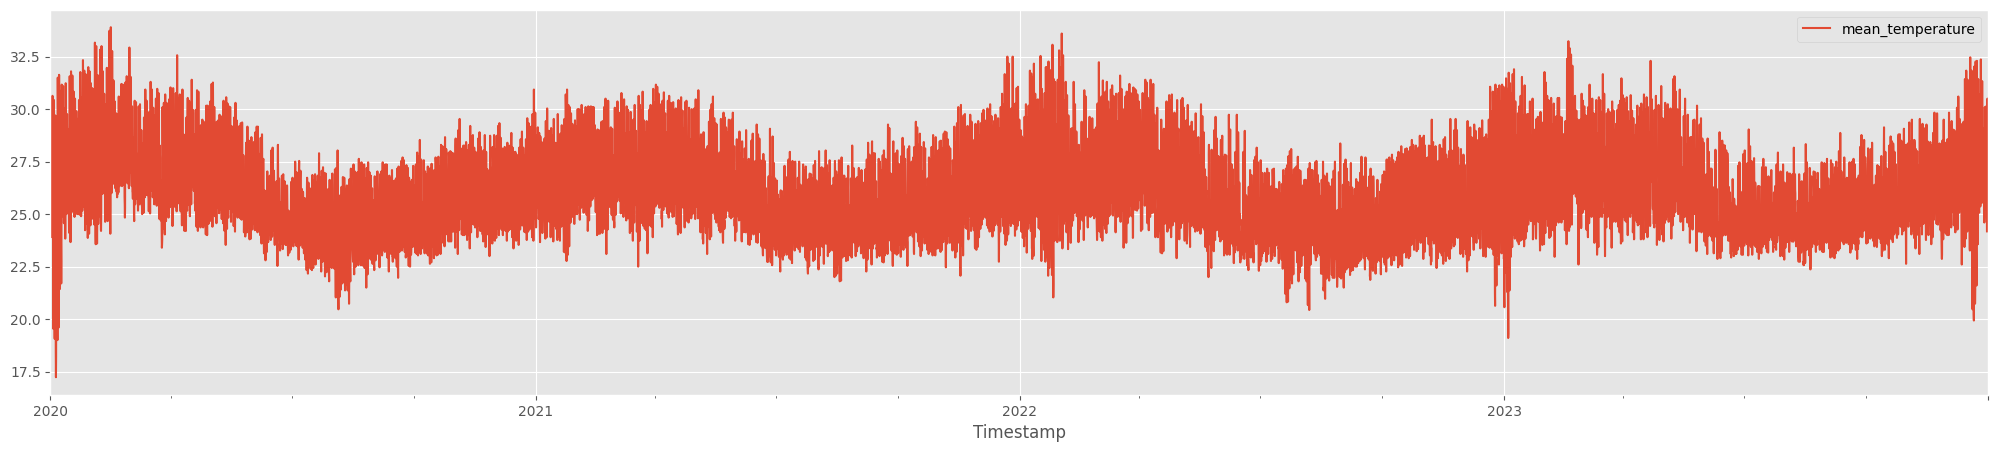

In [ ]:
transformed_df.index.names=['Timestamp']
transformed_df = transformed_df.sort_index()

value_column = 'temperature_2m'

transformed_df.plot();

Text(0.5, 1.0, 'Tendance')

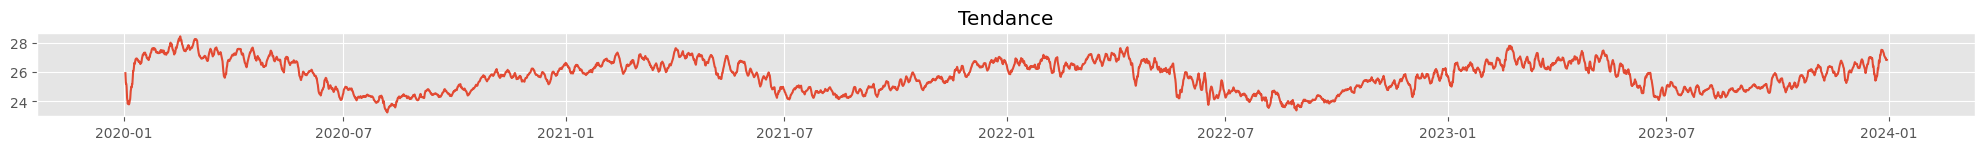

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Décomposer la série temporelle
decomposition = seasonal_decompose(transformed_df, model='additive')
# Tendance
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendance')

Text(0.5, 1.0, 'Saison')

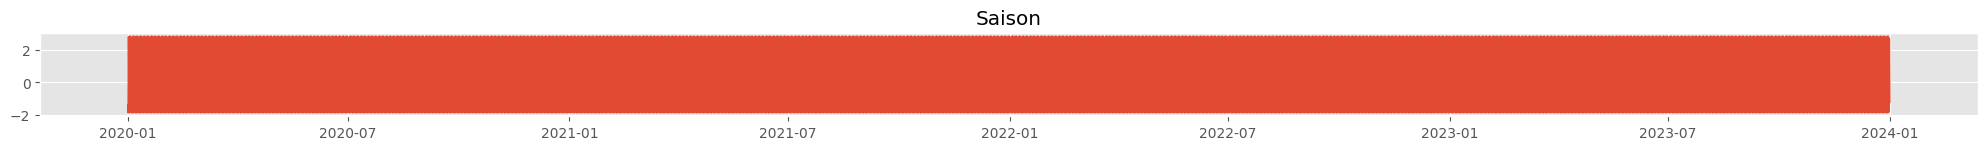

In [ ]:
# Saison
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Saison')

Text(0.5, 1.0, 'Résidus')

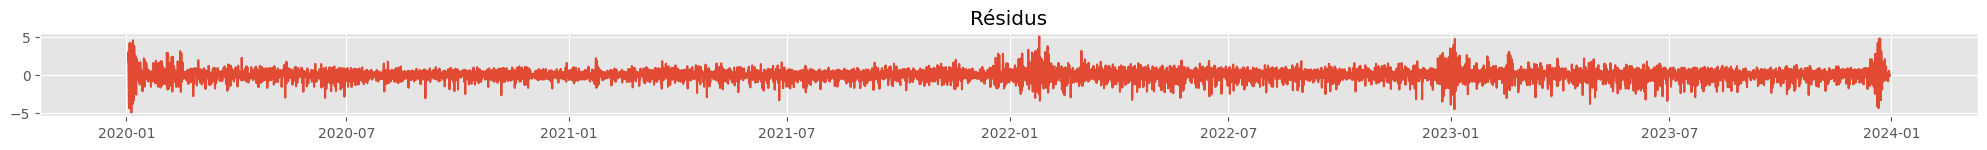

In [ ]:
# Résidus
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Résidus')

In [ ]:
# Kwiatkowski–Phillips–Schmidt–Shin test
def check_kpss_stat(ts):

  kpss_results = stattools.kpss(ts)
  kpss_stat = kpss_results[0]
  p_value = kpss_results[1]
  critical_values = kpss_results[3]

  print(f'The KPSS test results\
        \n  test statistic {kpss_stat:.3f},\
        \n  p-value: {p_value:.3f}\
        \n  critical values: {critical_values}')

  if (p_value > 0.05) or (kpss_stat < critical_values['5%']):
      print('The time series is stationary')
  else:
      print('The time series is NOT stationary')

warnings.filterwarnings('ignore')
check_kpss_stat(transformed_df)

The KPSS test results        
  test statistic 0.605,        
  p-value: 0.022        
  critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is NOT stationary


Differentiation par stabilization de la moyenne

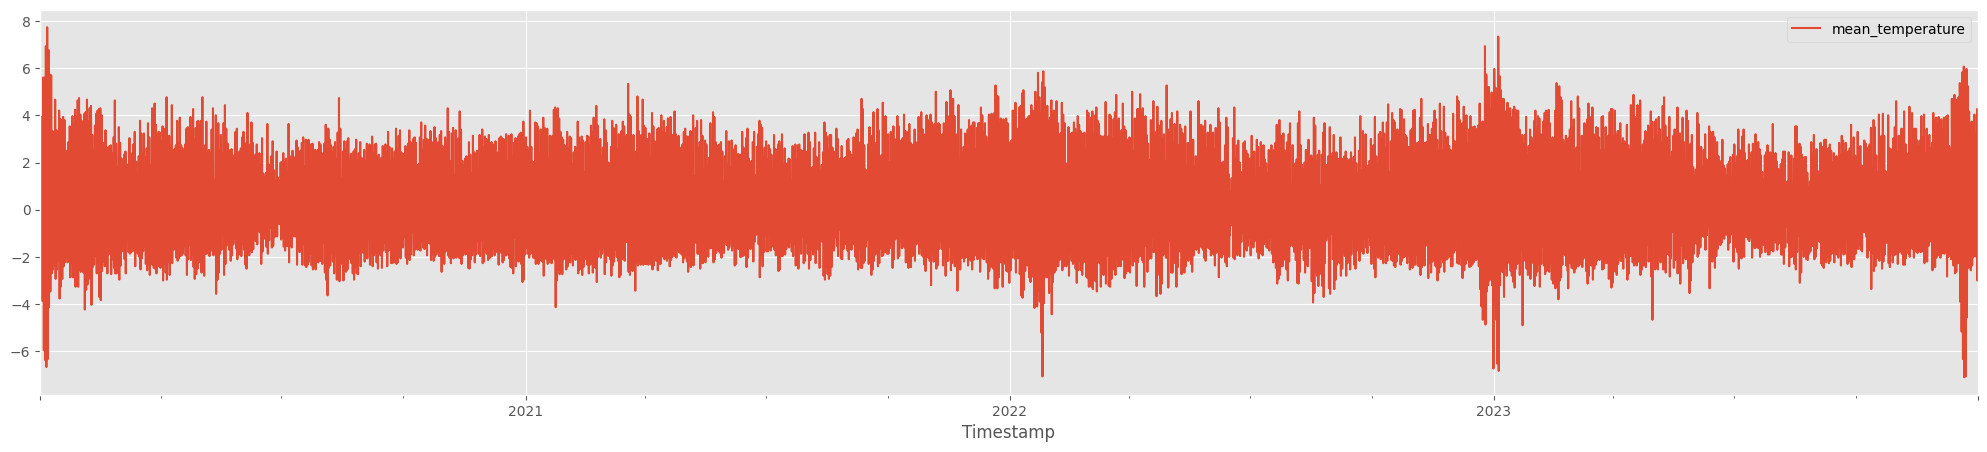

In [ ]:
# shift function return lagged data
# Differencing
diff_transformed_df = (transformed_df - transformed_df.shift(1))
# Drop NaN caused by shifting: just the first row in this case
diff_transformed_df.dropna(inplace=True)
diff_transformed_df.plot();

In [ ]:
# Check again stationarity test stats
check_adf_stat(diff_transformed_df)
print("*"*20)
check_kpss_stat(diff_transformed_df)

The Augmented Dickey-Fuller test results          
  test statistic -25.574,          
  p-value: 0.000          
  critical values: {'1%': -3.430911629910606, '5%': -2.861788210875281, '10%': -2.566902117568152}
The time series is stationary
********************
The KPSS test results        
  test statistic 0.005,        
  p-value: 0.100        
  critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is stationary


ARIMA(p,d,q)

In [ ]:
# Split data into train (80%) and test (20%) sets
ind_split = int(len(transformed_df) * 0.8)

ts_train = transformed_df[:ind_split]
ts_test = transformed_df[ind_split:]

transformed_df.shape, ts_train.shape, ts_test.shape

((11688, 1), (9350, 1), (2338, 1))

Autocorrelaction function (ACF)

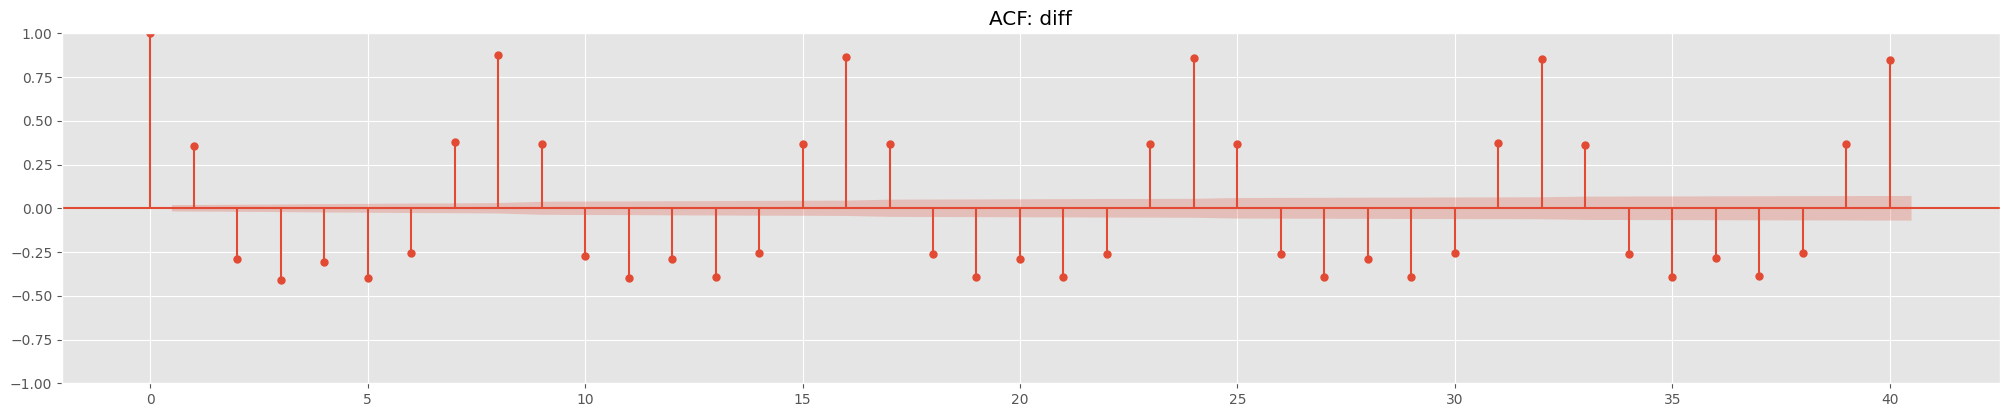

In [ ]:
import statsmodels.graphics.tsaplots as tsaplots

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_acf(diff_transformed_df, lags=40, ax=ax1, title="ACF: diff");

Partial Autocorrelation function (PACF)

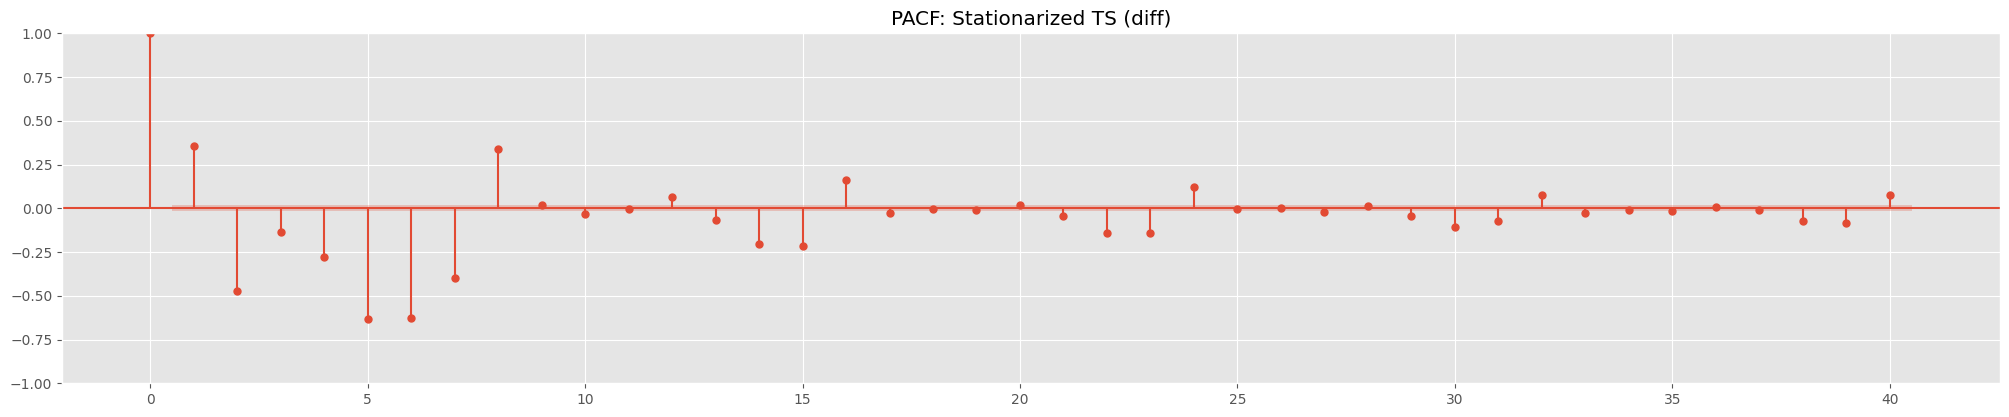

In [ ]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(211)
fig = tsaplots.plot_pacf(diff_transformed_df, lags=40, ax=ax1, title="PACF: Stationarized TS (diff)")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# p,d,q
order=(6,1,6)

model = ARIMA(ts_train, order=order).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:       mean_temperature   No. Observations:                 9350
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -8869.826
Date:                Mon, 01 Apr 2024   AIC                          17765.653
Time:                        09:50:58   BIC                          17858.512
Sample:                    01-01-2020   HQIC                         17797.190
                         - 03-14-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5117      0.039     13.020      0.000       0.435       0.589
ar.L2         -0.6582      0.025    -26.142      0.000      -0.708      -0.609
ar.L3         -0.4801      0.036    -13.508      0.0

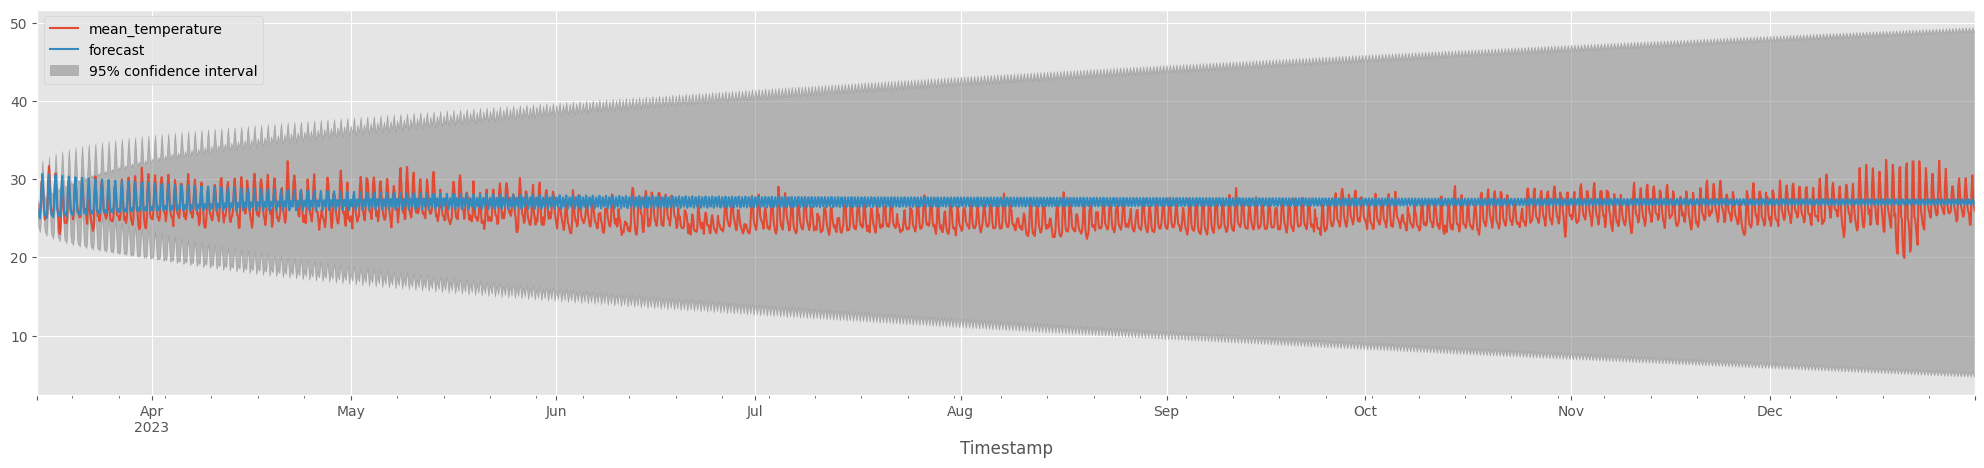

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
ax = ts_test.plot(ax=ax)
fig = plot_predict(model, start=ts_test.index[0], end=ts_test.index[-1], dynamic=False, ax=ax)
legend = ax.legend(loc="upper left")

sarimax

In [ ]:
p_values = range(0,6)
q_values = range(0,6)
d_values = range(0,2)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')

best_score_aic, best_cfg_aic = float("inf"), None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model = SARIMAX(ts_train, order=order).fit()
                if model.aic < best_score_aic:
                    best_score_aic, best_cfg_aic = model.aic, order
                    print(f'SARIMAX{order} AIC={model.aic:.3f}')
            except:
                continue

print(f'Best SARIMAX{best_cfg_aic} AIC={best_score_aic:.3f}')

SARIMAX(0, 0, 0) AIC=87346.354
SARIMAX(0, 0, 1) AIC=75067.549
SARIMAX(0, 0, 2) AIC=63761.364
SARIMAX(0, 0, 3) AIC=56458.197
SARIMAX(0, 0, 4) AIC=49166.017
SARIMAX(0, 0, 5) AIC=47787.378
SARIMAX(0, 1, 0) AIC=35786.664
SARIMAX(0, 1, 1) AIC=33259.497
SARIMAX(0, 1, 2) AIC=31863.590
SARIMAX(0, 1, 3) AIC=29275.405
SARIMAX(0, 1, 4) AIC=29213.957
SARIMAX(0, 1, 5) AIC=28242.465
SARIMAX(1, 1, 5) AIC=27794.334
SARIMAX(2, 1, 2) AIC=26705.124
SARIMAX(2, 1, 3) AIC=26473.179
SARIMAX(2, 1, 4) AIC=23243.642
SARIMAX(2, 1, 5) AIC=23170.432
SARIMAX(3, 1, 5) AIC=22607.267
SARIMAX(4, 1, 3) AIC=21132.032
SARIMAX(4, 1, 4) AIC=19120.327
SARIMAX(4, 1, 5) AIC=17864.767
Best SARIMAX(4, 1, 5) AIC=17864.767


In [ ]:
#making predictions
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

best_order = (4, 1, 5)
model_sarimax = SARIMAX(ts_train, order=best_order).fit()
ts_pred = model_sarimax.predict(start=ts_test.index[0], end=ts_test.index[-1])
rmse = mean_squared_error(ts_test.values, ts_pred.values, squared=False)
print(f'SARIMAX{best_order}\nAIC={model_sarimax.aic:.2f}\nRMSE (test)={rmse:.2f}')

SARIMAX(4, 1, 5)
AIC=17864.77
RMSE (test)=1.97


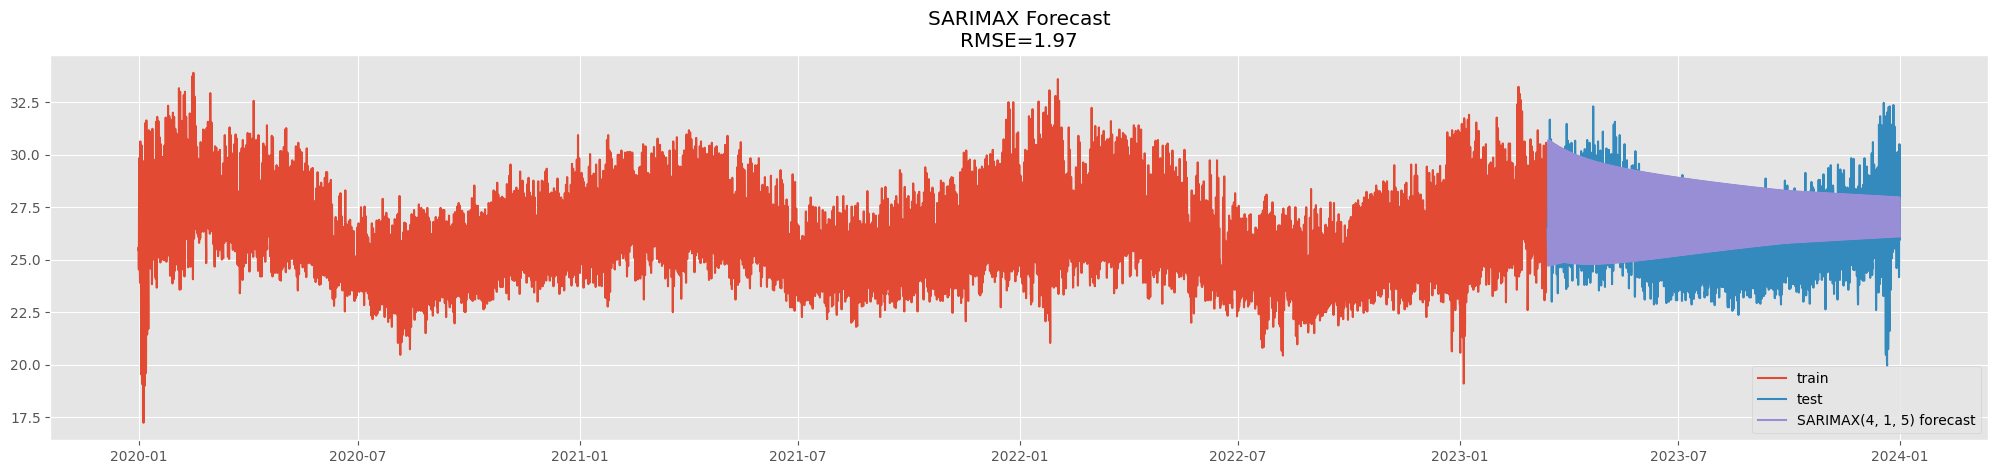

In [ ]:
plt.figure()
plt.plot(ts_train.index, ts_train.values, label='train')
plt.plot(ts_test.index, ts_test.values, label='test')
plt.plot(ts_pred.index, ts_pred.values, label=f'SARIMAX{best_order} forecast')
plt.legend(loc='best')
plt.title(f'SARIMAX Forecast\nRMSE={rmse:.2f}')
plt.show()

utilsation d'une variables exogenes et pretraitement

In [ ]:
#choix d'une variable supplémentaire dans la meme API
import requests
import pandas as pd

# Effectuer une requête GET à l'API
response = requests.get('https://archive-api.open-meteo.com/v1/archive?latitude=5.3544&longitude=-4.0017&start_date=2020-01-01&end_date=2023-12-31&hourly=apparent_temperature&timezone=GMT')

# Vérifier si la requête a réussi (code de statut 200)
if response.status_code == 200:
    # Convertir la réponse JSON en un dictionnaire Python
    data_dict = response.json()

    # Créer un DataFrame à partir du dictionnaire
    df_exog = pd.DataFrame(data_dict)

    # Afficher le DataFrame
    print(df_exog)
else:
    # Afficher un message d'erreur si la requête a échoué
    print('La requête à l\'API a échoué avec le code de statut :', response.status_code)

                      latitude  longitude  generationtime_ms  \
time                  5.377856  -4.023193           3.322005   
apparent_temperature  5.377856  -4.023193           3.322005   

                      utc_offset_seconds timezone timezone_abbreviation  \
time                                   0      GMT                   GMT   
apparent_temperature                   0      GMT                   GMT   

                      elevation hourly_units  \
time                       54.0      iso8601   
apparent_temperature       54.0           °C   

                                                                 hourly  
time                  [2020-01-01T00:00, 2020-01-01T01:00, 2020-01-0...  
apparent_temperature  [31.6, 31.1, 30.5, 30.1, 31.6, 31.6, 28.9, 29....  


In [ ]:
#create a new dataframe with only column time and temperature
new_dfv=pd.DataFrame(columns=['time','apparent_temperature'])
new_dfv['time']=df['hourly']['time']
new_dfv['apparent_temperature']=df['hourly']['apparent_temperature']
new_dfv.head()

,time,apparent_temperature
0,2020-01-01T00:00,31.6
1,2020-01-01T01:00,31.1
2,2020-01-01T02:00,30.5
3,2020-01-01T03:00,30.1
4,2020-01-01T04:00,31.6


In [ ]:
#convert to datetime
new_dfv['time'] = pd.to_datetime(new_dfv['time'])


In [ ]:
#set index
new_dfv= new_dfv.set_index('time')
new_dfv.head()

,apparent_temperature
time,
2020-01-01 00:00:00,31.6
2020-01-01 01:00:00,31.1
2020-01-01 02:00:00,30.5
2020-01-01 03:00:00,30.1
2020-01-01 04:00:00,31.6


In [ ]:
#rename colonne apparent_temparature
new_dfv = new_dfv.rename(columns={'apparent_temperature': 'temperature_2m'})
new_dfv.head()

,temperature_2m
time,
2020-01-01 00:00:00,31.6
2020-01-01 01:00:00,31.1
2020-01-01 02:00:00,30.5
2020-01-01 03:00:00,30.1
2020-01-01 04:00:00,31.6


In [ ]:
import warnings
warnings.filterwarnings('ignore')
transformed_dfv=moyenne_temperatures_successives(new_dfv)
transformed_dfv.head()


,time,mean_temperature
0,2020-01-01 00:00:00,31.066667
1,2020-01-01 03:00:00,31.100000
2,2020-01-01 06:00:00,29.800000
3,2020-01-01 09:00:00,33.433333
4,2020-01-01 12:00:00,35.466667


In [ ]:
transformed_dfv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11688 entries, 0 to 11687
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              11688 non-null  datetime64[ns]
 1   mean_temperature  11688 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


In [ ]:
#rename colonne apparent_temparature
transformed_dfv = transformed_dfv.rename(columns={'mean_temperature': 'apparent_mean_temperature'})
transformed_dfv.head()

,time,apparent_mean_temperature
0,2020-01-01 00:00:00,31.066667
1,2020-01-01 03:00:00,31.100000
2,2020-01-01 06:00:00,29.800000
3,2020-01-01 09:00:00,33.433333
4,2020-01-01 12:00:00,35.466667


In [ ]:
#set index
transformed_dfv= transformed_dfv.set_index('time')

SARIMAX Model improvment

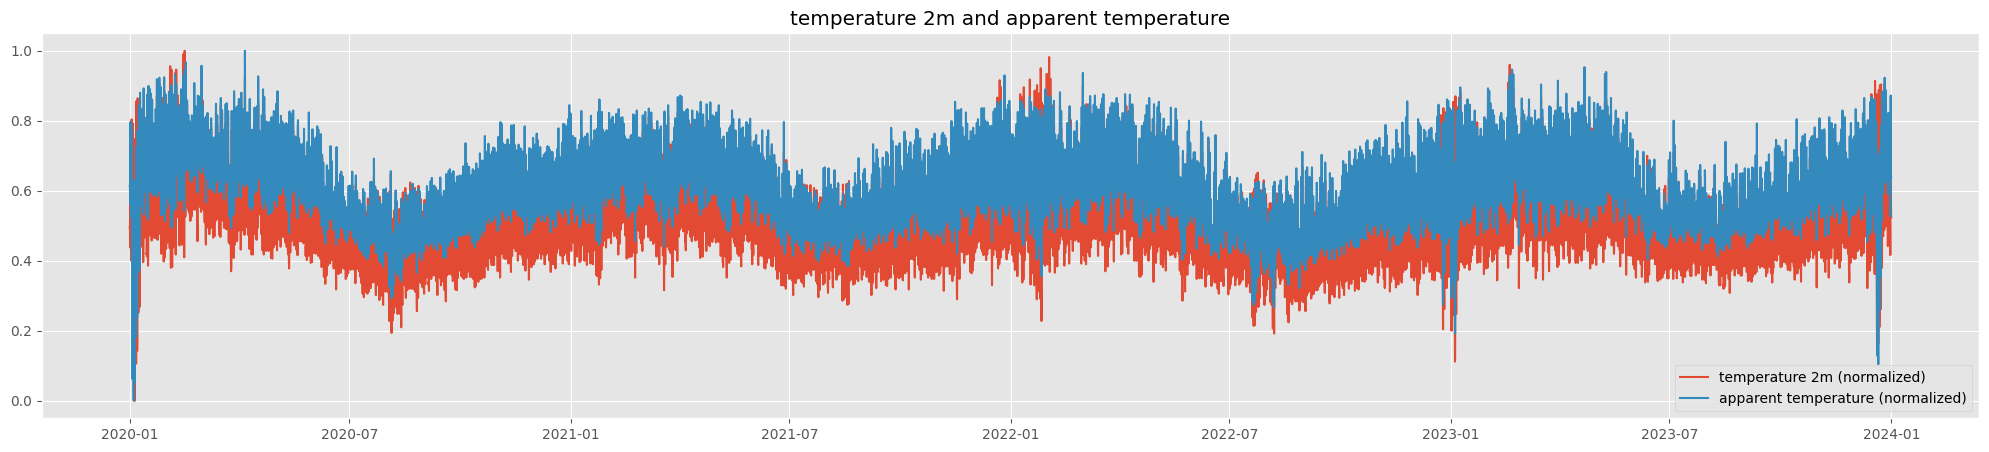

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ts_apparent_temperature = transformed_dfv['apparent_mean_temperature']

apparent_temperature_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(ts_apparent_temperature.values.reshape(-1, 1))
temperature_2m_normalized = MinMaxScaler(feature_range=(0, 1)).fit_transform(transformed_df.values.reshape(-1, 1))

plt.figure()
plt.plot(transformed_df.index, temperature_2m_normalized, label='temperature 2m (normalized)')
plt.plot(transformed_dfv.index, apparent_temperature_normalized, label='apparent temperature (normalized)')
plt.legend(loc='best')
plt.title('temperature 2m and apparent temperature')
plt.show()

In [ ]:
ts_train_apparent = ts_apparent_temperature[:ind_split]
ts_test_apparent = ts_apparent_temperature[ind_split:]


In [ ]:
order = (4, 1, 5)
model_sarimax_exog = SARIMAX(ts_train, exog=ts_train_apparent, order=order).fit()
ts_pred_exog = model_sarimax_exog.predict(start=ts_test.index[0], end=ts_test.index[-1], exog=ts_test_apparent)
rmse = mean_squared_error(ts_test.values, ts_pred_exog.values, squared=False)
print(f'SARIMAX{order}\nAIC={model_sarimax_exog.aic:.2f}\nRMSE (test)={rmse:.2f}')

SARIMAX(4, 1, 5)
AIC=7415.50
RMSE (test)=0.68


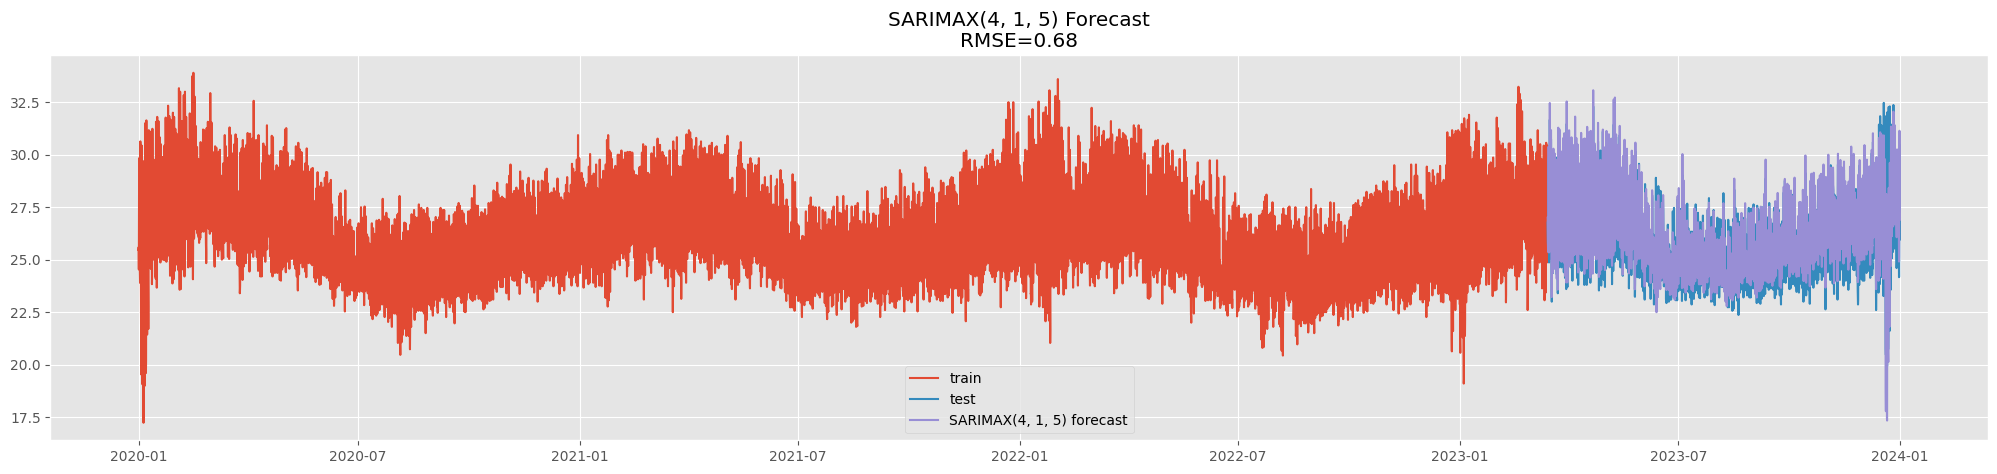

In [ ]:
plt.figure()
plt.plot(ts_train.index, ts_train.values, label='train')
plt.plot(ts_test.index, ts_test.values, label='test')
plt.plot(ts_pred_exog.index, ts_pred_exog.values, label=f'SARIMAX{best_order} forecast')
plt.legend(loc='best')
plt.title(f'SARIMAX{order} Forecast\nRMSE={rmse:.2f}')
plt.show()

RESIDUAL ANALYSIS

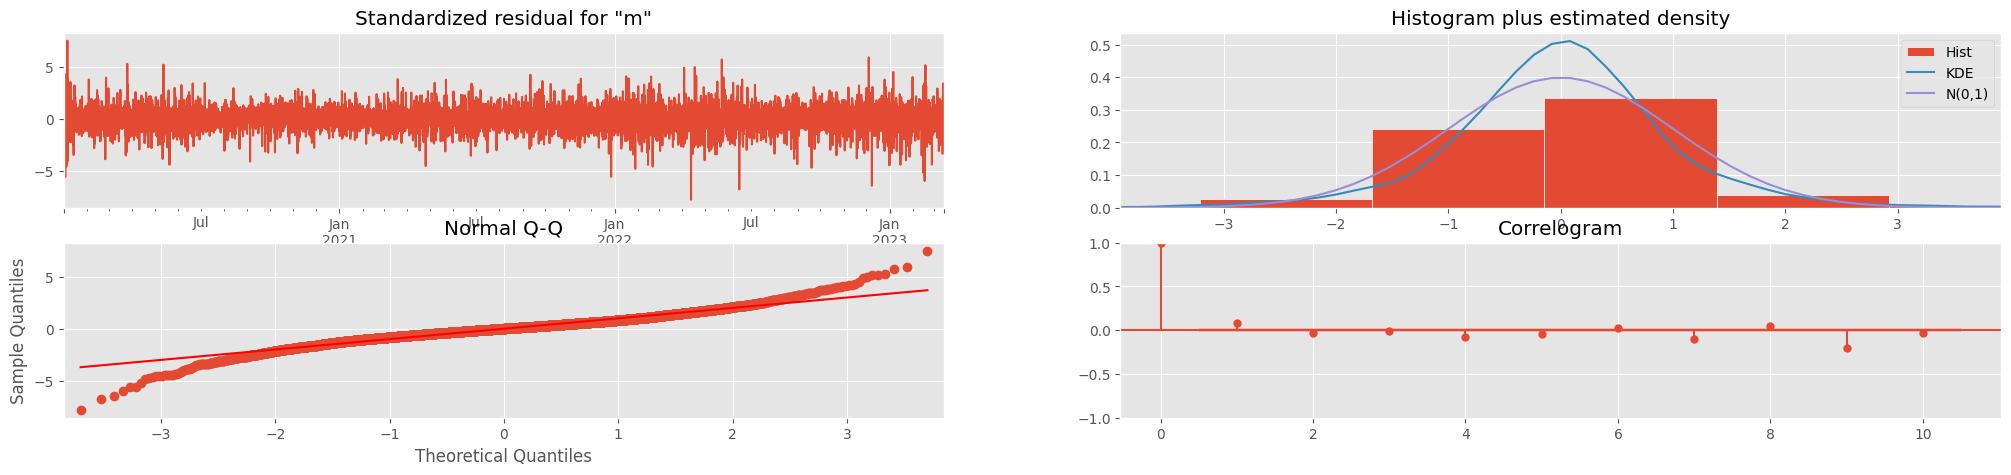

In [ ]:
# from statsmodels.graphics.gofplots import qqplot

#MODEL_SARIMAX
residuals = model_sarimax.resid
# qqplot(residuals, line='45');
model_sarimax.plot_diagnostics();

The distribution of the residuals is close to a normal distribution.

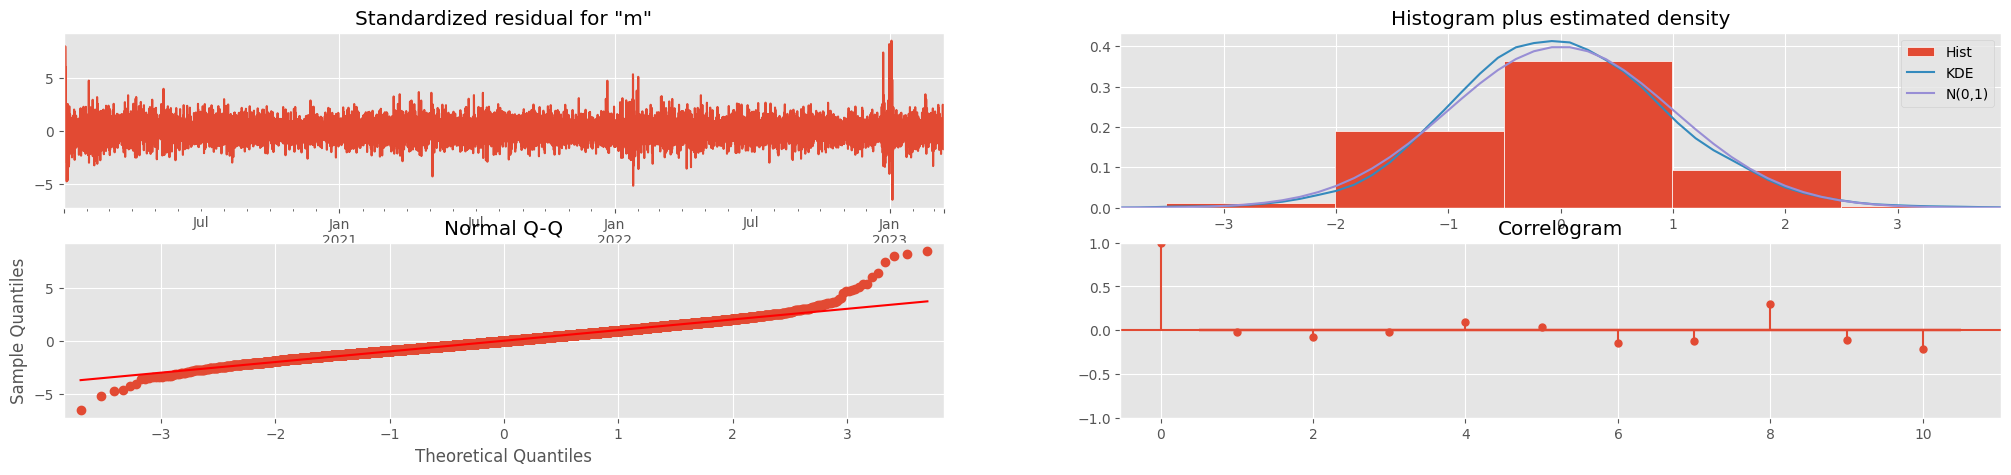

In [ ]:
# from statsmodels.graphics.gofplots import qqplot

#MODEL_SARIMAX
residuals = model_sarimax_exog.resid
# qqplot(residuals, line='45');
model_sarimax_exog.plot_diagnostics();

The distribution of the residuals is close to a normal distribution.